In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [2]:
y_test = pd.read_csv("y_test_FE.csv")

In [3]:
naive_bayes_predictions = np.loadtxt("naive_bayes_predictions.txt") 
lightGBM_predictions = np.loadtxt("lightGBM_predictions.txt") 
blending_predictions = np.loadtxt("blending_result.txt") 
stacking_predictions = np.loadtxt("stacking_result.txt") 
benchmark_prediction = np.loadtxt("benchmark_result.txt") 

# Plot the ROC curve for each model:

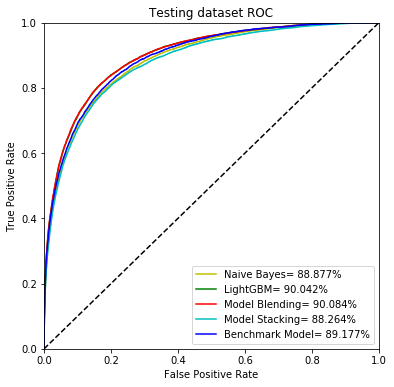

In [11]:
from sklearn import metrics

## Plot the ROC curve for different models
plt.figure(figsize=(6,6))
plt.title('Testing dataset ROC')

predictions_list = [naive_bayes_predictions, lightGBM_predictions, blending_predictions, stacking_predictions, benchmark_prediction]
colors = ['y', 'g', 'r', 'c', 'b']
algorithms = ['Naive Bayes', 'LightGBM', 'Model Blending', 'Model Stacking', 'Benchmark Model']

for prediction, color, algorithm in zip(predictions_list, colors, algorithms):
    fpr, tpr, threshold = metrics.roc_curve(y_test['0'], prediction)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.plot(fpr, tpr, 'b', label = '{}= {:0.3f}%'.format(algorithm, roc_auc*100), color=color)
    
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color='k')
plt.xlim([0, 1])

plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()